In [2]:
import pandas as pd 
import numpy as np 

reviews = pd.read_csv("reviews_clean.csv")
print(reviews.info())
print(reviews.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097996 entries, 0 to 2097995
Data columns (total 8 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Unnamed: 0     int64 
 1   listing_id     int64 
 2   id             int64 
 3   date           object
 4   reviewer_id    int64 
 5   reviewer_name  object
 6   comments       object
 7   text           object
dtypes: int64(4), object(4)
memory usage: 128.1+ MB
None
         Unnamed: 0    listing_id            id   reviewer_id
count  2.097996e+06  2.097996e+06  2.097996e+06  2.097996e+06
mean   1.048998e+06  3.572207e+17  7.776855e+17  1.968301e+08
std    6.056394e+05  4.905399e+17  5.533266e+17  1.875552e+08
min    0.000000e+00  1.391300e+04  2.103200e+04  4.400000e+01
25%    5.244988e+05  1.581313e+07  5.707448e+08  4.043916e+07
50%    1.048998e+06  3.798997e+07  9.259551e+17  1.279123e+08
75%    1.573496e+06  8.332622e+17  1.261510e+18  3.257543e+08
max    2.097995e+06  1.508900e+18  1.512348e+18  7.188301e+08


In [3]:
reviews.head()

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,text
0,0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...,girlfriend hadnt known Alina took leap faith r...
1,1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...,Alina really good host flat clean tidy really ...
2,2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...,Alina amazing host made feel right home like h...
3,3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ...",Alinas place nice room big clean bed huge Alin...
4,4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor...",Nice location Islington area good short busine...


In [4]:
users = reviews['id'].unique()
listings_id = reviews['listing_id'].unique()
print(f'We have {len(users)} unique users.')
print(f'We have {len(reviews)} total reviews.')
print(f'We have {len(listings_id)} listings considered.')

We have 2097996 unique users.
We have 2097996 total reviews.
We have 72749 listings considered.


In [5]:
numbers_reviews = reviews.groupby("listing_id").size().reset_index(name="num_reviews")

In [6]:
print(f'There are approx. {float(numbers_reviews['num_reviews'].median())} per listing, with an average of {float(numbers_reviews['num_reviews'].mean())}.')

There are approx. 10.0 per listing, with an average of 28.838829399716836.


In [7]:
listings = pd.read_csv("listings.csv")
print(listings.info())
print(listings.describe())
print(listings.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96871 entries, 0 to 96870
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96871 non-null  int64  
 1   listing_url                                   96871 non-null  object 
 2   scrape_id                                     96871 non-null  int64  
 3   last_scraped                                  96871 non-null  object 
 4   source                                        96871 non-null  object 
 5   name                                          96871 non-null  object 
 6   description                                   94421 non-null  object 
 7   neighborhood_overview                         41208 non-null  object 
 8   picture_url                                   96865 non-null  object 
 9   host_id                                       96871 non-null 

In [8]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [9]:
notes = reviews.merge(listings, left_on = 'listing_id', right_on="id")

notes.head()

,Unnamed: 0,listing_id,id_x,date,reviewer_id,reviewer_name,comments,text,id_y,listing_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...,girlfriend hadnt known Alina took leap faith r...,13913,https://www.airbnb.com/rooms/13913,...,4.87,4.78,4.78,NaN,f,2,1,1,0,0.3
1,1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...,Alina really good host flat clean tidy really ...,13913,https://www.airbnb.com/rooms/13913,...,4.87,4.78,4.78,NaN,f,2,1,1,0,0.3
2,2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...,Alina amazing host made feel right home like h...,13913,https://www.airbnb.com/rooms/13913,...,4.87,4.78,4.78,NaN,f,2,1,1,0,0.3
3,3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ...",Alinas place nice room big clean bed huge Alin...,13913,https://www.airbnb.com/rooms/13913,...,4.87,4.78,4.78,NaN,f,2,1,1,0,0.3
4,4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor...",Nice location Islington area good short busine...,13913,https://www.airbnb.com/rooms/13913,...,4.87,4.78,4.78,NaN,f,2,1,1,0,0.3


In [10]:
import matplotlib.pyplot as plt

def distribution(df, col, bins=30, kde=False):

    data = df[col].dropna()
    
    plt.figure()
    plt.hist(data, bins=bins, density=kde)
    
    if kde:
        from scipy.stats import gaussian_kde
        import numpy as np
        x = np.linspace(data.min(), data.max(), 500)
        kde_curve = gaussian_kde(data)
        plt.plot(x, kde_curve(x))
    
    plt.xlabel(col)
    plt.ylabel("Density" if kde else "Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()


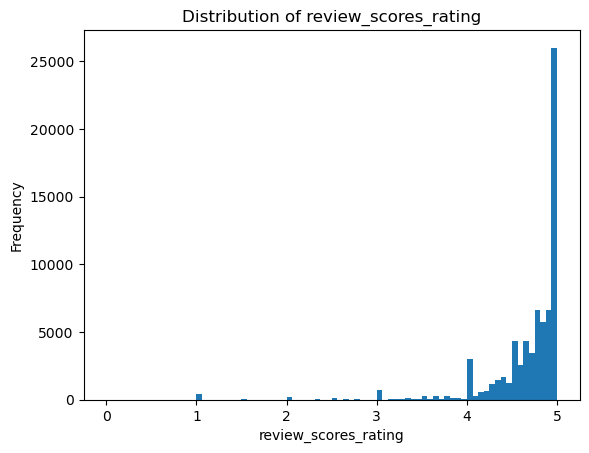

In [11]:
distribution(listings, "review_scores_rating", bins = 80)

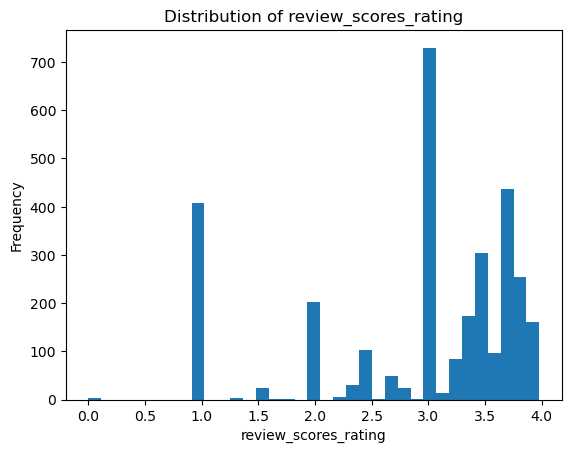

We will be working with 3115 listings for negative and 69634 for positive listings.


In [12]:
# Our focus group
distribution(listings[listings['review_scores_rating'] < 4], "review_scores_rating", bins = 35)
print(
    f"We will be working with {len(listings[listings['review_scores_rating'] < 4])} "
    f"listings for negative and "
    f"{len(listings[listings['review_scores_rating'] >= 4])} for positive listings."
)


In [13]:
rev = [r for r in notes.columns if "scores" in r] 
scores = notes[['listing_id'] + rev]
scores.head()

,listing_id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,13913,4.85,4.8,4.8,4.81,4.87,4.78,4.78
1,13913,4.85,4.8,4.8,4.81,4.87,4.78,4.78
2,13913,4.85,4.8,4.8,4.81,4.87,4.78,4.78
3,13913,4.85,4.8,4.8,4.81,4.87,4.78,4.78
4,13913,4.85,4.8,4.8,4.81,4.87,4.78,4.78


In [14]:
scores.describe()

,listing_id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.097996e+06,2.097996e+06,2.097981e+06,2.097987e+06,2.097953e+06,2.097976e+06,2.097952e+06,2.097952e+06
mean,3.572207e+17,4.752628e+00,4.798412e+00,4.733451e+00,4.855227e+00,4.872123e+00,4.774762e+00,4.695028e+00
std,4.905399e+17,2.293123e-01,2.037208e-01,2.540624e-01,1.723847e-01,1.684781e-01,1.992023e-01,2.295603e-01
min,1.391300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.581313e+07,4.660000e+00,4.730000e+00,4.630000e+00,4.810000e+00,4.830000e+00,4.690000e+00,4.590000e+00
50%,3.798997e+07,4.810000e+00,4.850000e+00,4.800000e+00,4.900000e+00,4.920000e+00,4.820000e+00,4.740000e+00
75%,8.332622e+17,4.910000e+00,4.930000e+00,4.910000e+00,4.960000e+00,4.970000e+00,4.910000e+00,4.850000e+00
max,1.508900e+18,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


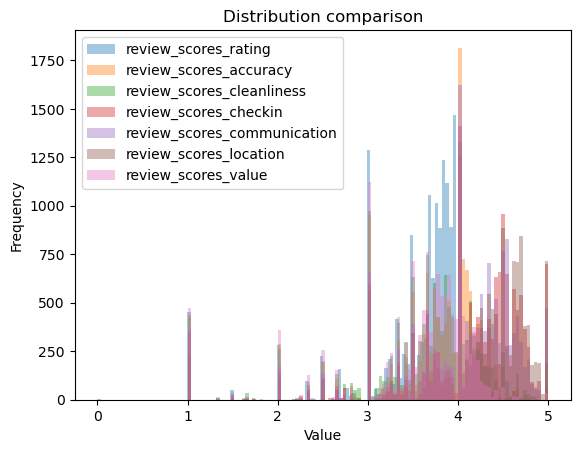

In [15]:
import matplotlib.pyplot as plt

plt.figure()
scores_neg = scores[scores['review_scores_rating'] < 4]
for r in rev:
    data = scores_neg[r].dropna()
    plt.hist(data, bins=100, alpha=0.4, label=r)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution comparison")
plt.legend()
plt.show()


In [17]:
len(scores[scores['review_scores_checkin'] == 1])

357

In [ ]:
def l(text):
    if isinstance(text, str):
        return len(text)
    return 0

notes['len_text'] = notes['text'].apply(l)
empties = notes[notes['len_text'] == 0]

In [ ]:
print(f'There are {len(notes[notes['len_text'] == 0])} empty reviews, out of which {len(empties[empties['review_scores_rating'] < 4])} are "negative".')

There are 4438 empty reviews, out of which 88 are "negative".


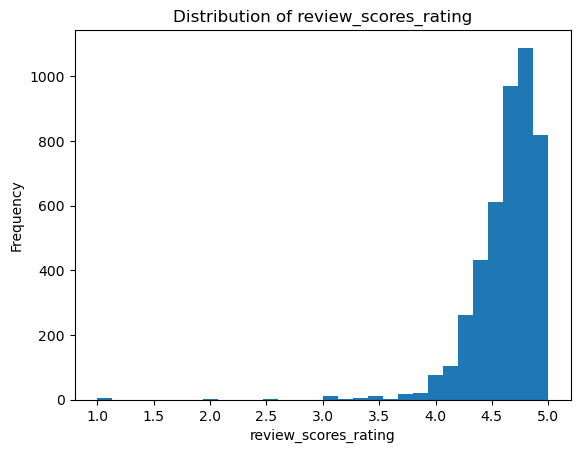

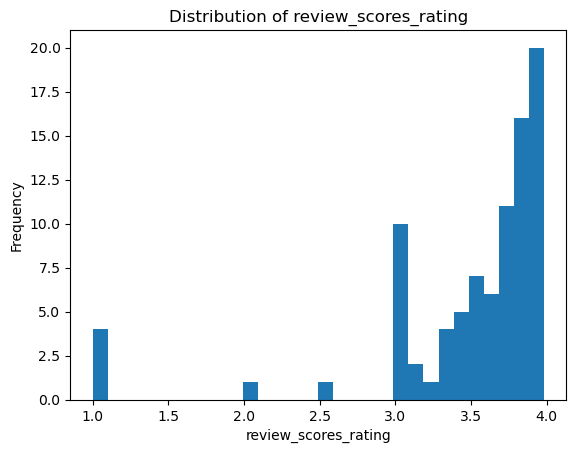

In [ ]:

empties['review_scores_rating']
distribution(empties, 'review_scores_rating', bins = 30)
distribution(empties[empties['review_scores_rating'] < 4], 'review_scores_rating', bins = 30)


In [ ]:
def avg(row):
    return np.mean(row)

score_cols = [c for c in notes.columns if "scores" in c]

# notes["review"] = notes[score_cols].apply(avg, axis=1)
# scores['review'] = scores[score_cols].apply(avg, axis = 1)

/var/folders/k9/89sz9rmn25s78pr1yz7ytdz40000gn/T/ipykernel_59307/1639324290.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores['review'] = scores[score_cols].apply(avg, axis = 1)


In [ ]:
notes.to_csv("notes.csv")
scores.to_csv("scores.csv")

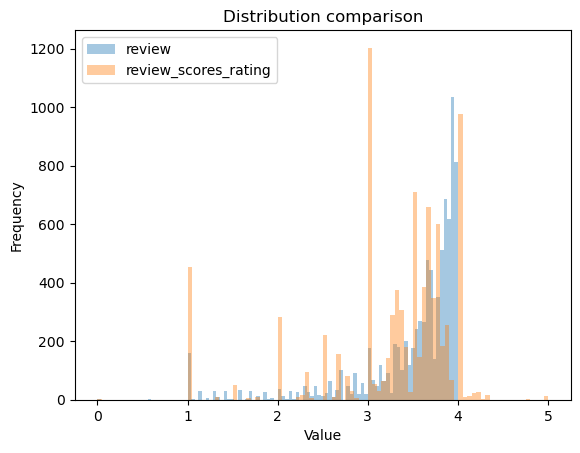

In [ ]:
import matplotlib.pyplot as plt
scores_neg = scores[scores['review'] < 4]
plt.figure()
for r in ['review', 'review_scores_rating']:
    data = scores_neg[r].dropna()
    plt.hist(data, bins=100, alpha=0.4, label=r)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution comparison")
plt.legend()
plt.show()


In [ ]:
notes.columns

Index(['Unnamed: 0', 'listing_id', 'id_x', 'date', 'reviewer_id',
       'reviewer_name', 'comments', 'text', 'id_y', 'listing_url', 'scrape_id',
       'last_scraped', 'source', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_

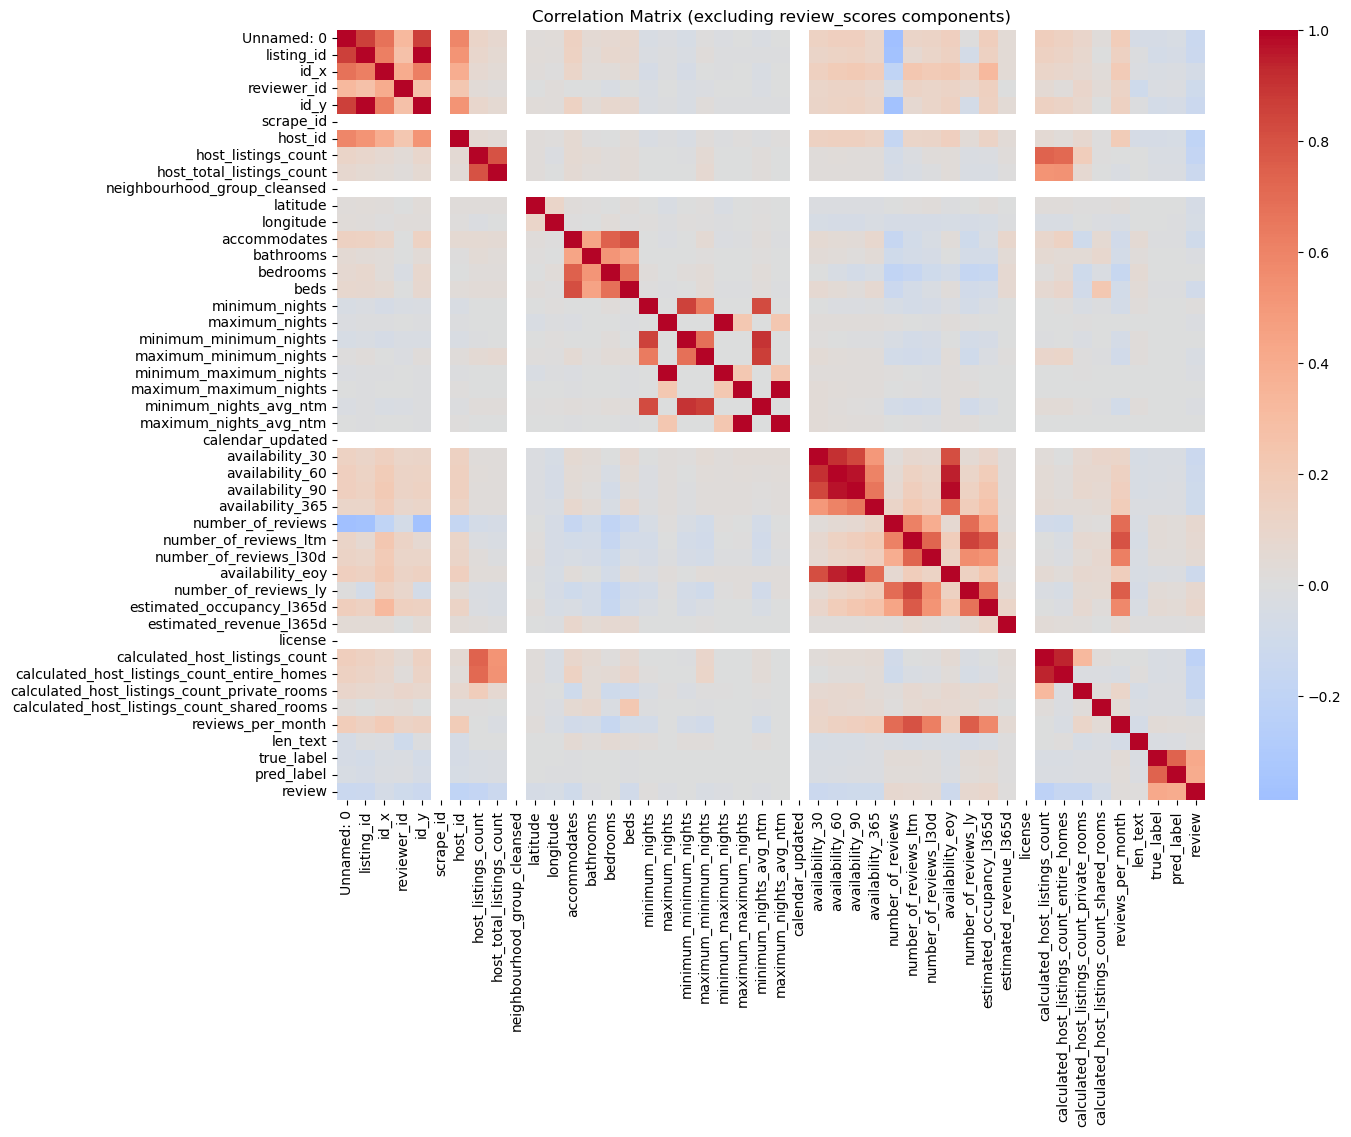

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
num_cols = notes.select_dtypes(include=["number"]).columns

# Remove review score components to avoid circular correlation
exclude = [c for c in num_cols if "review_scores" in c]
exclude.append("review")  # we add it manually later

features = [c for c in num_cols if c not in exclude]

# Compute correlation with review
corr = notes[features + ["review"]].corr()

# Plot
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (excluding review_scores components)")
plt.show()
